# **Income and CES score**
## **Description**
In this notebook I want to look at the correlation between CES scores and income, followed by plotting where Inglewood and Beverly Hills fall within that correlation.
##### **Author**: Myranda Arreola
***

### **Import Median Household Income Data**

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('data/MHI.geojson', 
                    dtype={'geoid': str})

# drop row 0
gdf = gdf.drop([0])

# drop the margin of error column
gdf.drop(columns=['B19013001, Error'], inplace=True)

# Rename the 'b19013001' column to 'Median Household Income'
gdf.rename(columns={'B19013001': 'Median Household Income'}, inplace=True)

# Drop rows where 'Median Household Income' is NaN
gdf = gdf[~gdf['Median Household Income'].isna()]

In [3]:
# create a new column 'FIPS' by extracting that portion from geoid column
gdf['Census Tract'] = gdf['geoid'].str[7:]

In [4]:
gdf.head()

,geoid,name,Median Household Income,geometry,Census Tract
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",68972.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",06037101110
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",118859.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",06037101122
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",65139.0,"MULTIPOLYGON (((-118.28592 34.25404, -118.2859...",06037101220
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",53348.0,"MULTIPOLYGON (((-118.29792 34.25597, -118.2969...",06037101221
5,14000US06037101222,"Census Tract 1012.22, Los Angeles, CA",36779.0,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931...",06037101222


### **Import CES Scord Data**

In [5]:
df = pd.read_csv('data/Calenviroscreen4.csv',
    dtype=
    {
        'Census Tract':str,
        'California County':str,
        'Approximate Location': str
     }
)
df.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95


In [6]:
df['Census Tract'] = df['Census Tract'].str.zfill(11)

In [7]:
# look at the data types, verbose = True shows us all the counts
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   object 
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8   CES 4.0 Percentile           7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [8]:
columns_to_keep = ['Census Tract',
                   'Total Population',
                   'California County',
                   'Approximate Location',
                   'CES 4.0 Score',
                   'CES 4.0 Percentile Range',
                   'Pollution Burden Pctl',
                   'Pop. Char. Pctl',
                   'PM2.5 Pctl',
                   'Drinking Water Pctl',
                   'Tox. Release Pctl',
                   'Cleanup Sites Pctl',
                   'Asthma Pctl',
                   'Cardiovascular Disease Pctl']
df = df[columns_to_keep]
df.info

<bound method DataFrame.info of      Census Tract  Total Population California County  \
0     06019001100              2780           Fresno    
1     06077000700              4680       San Joaquin   
2     06037204920              2751       Los Angeles   
3     06019000700              3664           Fresno    
4     06019000200              2689           Fresno    
...           ...               ...               ...   
8030  06107004000               582           Tulare    
8031  06109985202              2509         Tuolumne    
8032  06111001206               778          Ventura    
8033  06111003012               675          Ventura    
8034  06111980000               118          Ventura    

                     Approximate Location  CES 4.0 Score  \
0                                  Fresno          93.18   
1                                Stockton          86.65   
2                             Los Angeles          82.39   
3                                  Fresno  

In [9]:
dfLA = df[df['California County'] == 'Los Angeles']

In [10]:
dfLA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2343 entries, 2 to 7990
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 2343 non-null   object 
 1   Total Population             2343 non-null   int64  
 2   California County            2343 non-null   object 
 3   Approximate Location         2343 non-null   object 
 4   CES 4.0 Score                2297 non-null   float64
 5   CES 4.0 Percentile Range     2297 non-null   object 
 6   Pollution Burden Pctl        2343 non-null   float64
 7   Pop. Char. Pctl              2297 non-null   float64
 8   PM2.5 Pctl                   2343 non-null   float64
 9   Drinking Water Pctl          2326 non-null   float64
 10  Tox. Release Pctl            2343 non-null   float64
 11  Cleanup Sites Pctl           2343 non-null   float64
 12  Asthma Pctl                  2334 non-null   float64
 13  Cardiovascular Disease 

### **Import Census Tract Data**

In [11]:
# add census tract csv
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [12]:
# join data
tracts['Census Tract'] ='06' + '037' + tracts['CT20']

In [13]:
# merge data
CT=tracts.merge(df,on="Census Tract")

In [14]:
CT.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

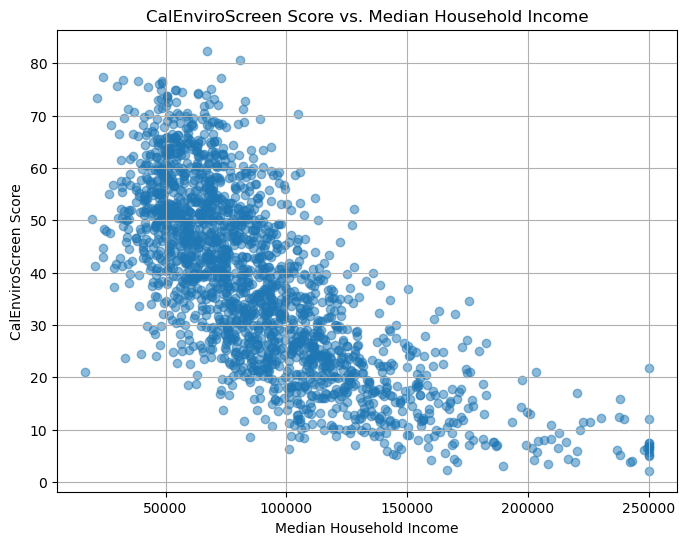

Correlation coefficient between CalEnviroScreen Score and Median Household Income: -0.7240554259683379


In [15]:
# Merge median household income data with CalEnviroScreen data
merged_data = CT.merge(gdf, on="Census Tract")

# Calculate the correlation coefficient between CalEnviroScreen scores and median household income
correlation = merged_data['CES 4.0 Score'].corr(merged_data['Median Household Income'])

# Visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Median Household Income'], merged_data['CES 4.0 Score'], alpha=0.5)
plt.title('CalEnviroScreen Score vs. Median Household Income')
plt.xlabel('Median Household Income')
plt.ylabel('CalEnviroScreen Score')
plt.grid(True)
plt.show()

print(f"Correlation coefficient between CalEnviroScreen Score and Median Household Income: {correlation}")


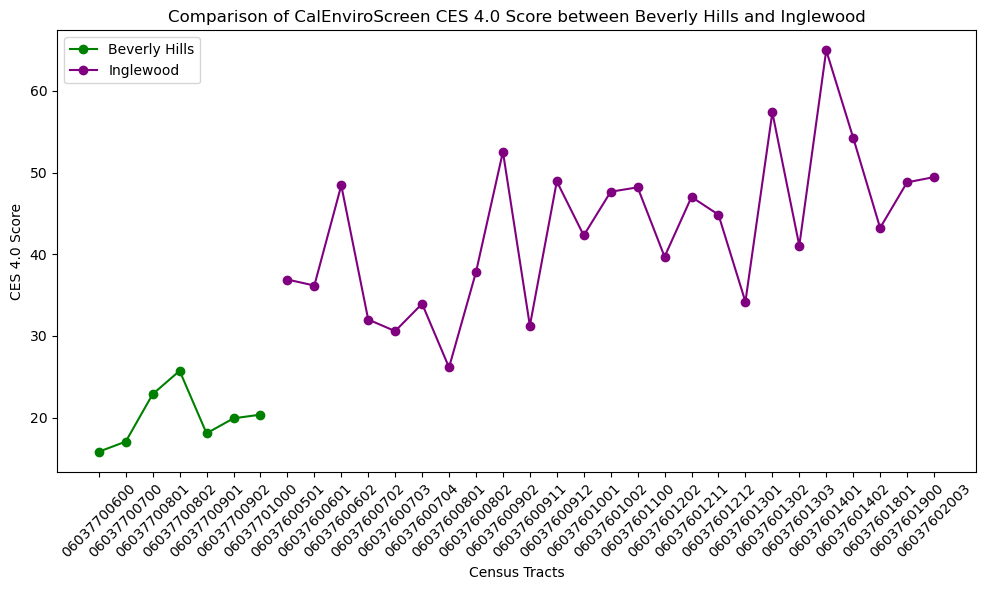

In [16]:
# Filter data for Beverly Hills and Inglewood
beverly_hills = merged_data[(merged_data['California County'] == 'Los Angeles') & (merged_data['Approximate Location'] == 'Beverly Hills')]
inglewood = merged_data[(merged_data['California County'] == 'Los Angeles') & (merged_data['Approximate Location'] == 'Inglewood')]

# Plotting the line chart for CES 4.0 Score only
plt.figure(figsize=(10, 6))

plt.plot(beverly_hills['Census Tract'], beverly_hills['CES 4.0 Score'], label='Beverly Hills', marker='o', color='green')
plt.plot(inglewood['Census Tract'], inglewood['CES 4.0 Score'], label='Inglewood', marker='o', color='purple')

# Adding labels and title
plt.xlabel('Census Tracts')
plt.ylabel('CES 4.0 Score')
plt.title('Comparison of CalEnviroScreen CES 4.0 Score between Beverly Hills and Inglewood')
plt.legend()

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


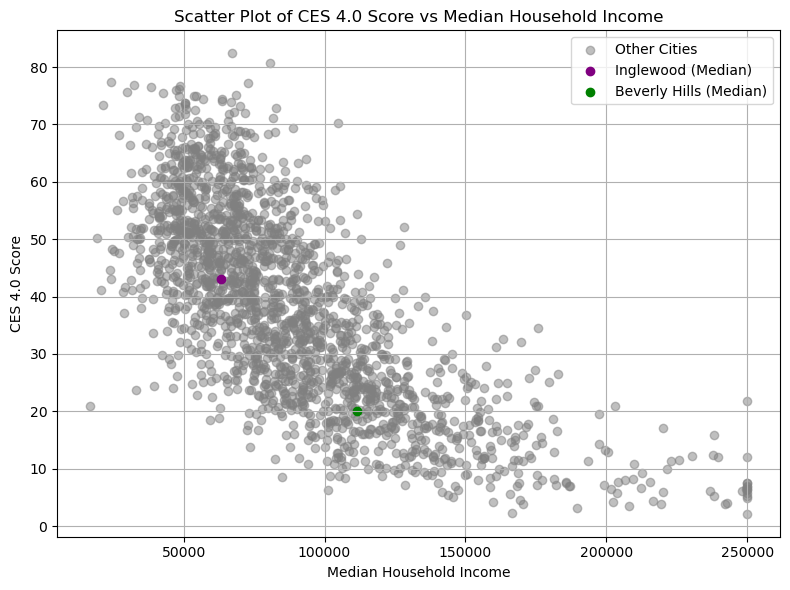

In [20]:
import matplotlib.pyplot as plt

# Filter data for Inglewood and Beverly Hills
inglewood_data = merged_data[merged_data['Approximate Location'] == 'Inglewood']
beverlyhills_data = merged_data[merged_data['Approximate Location'] == 'Beverly Hills']

# Filter data for Inglewood and Beverly Hills
inglewood_median_income = merged_data.loc[merged_data['Approximate Location'] == 'Inglewood', 'Median Household Income'].median()
beverlyhills_median_income = merged_data.loc[merged_data['Approximate Location'] == 'Beverly Hills', 'Median Household Income'].median()

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['Median Household Income'], merged_data['CES 4.0 Score'], alpha=0.5, label='Other Cities', color='gray')
plt.scatter(inglewood_median_income, inglewood_data['CES 4.0 Score'].mean(), color='purple', label='Inglewood (Median)')
plt.scatter(beverlyhills_median_income, beverlyhills_data['CES 4.0 Score'].mean(), color='green', label='Beverly Hills (Median)')

plt.title('Scatter Plot of CES 4.0 Score vs Median Household Income')
plt.xlabel('Median Household Income')
plt.ylabel('CES 4.0 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensures tight layout to prevent overlap
plt.show()
